In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv("pizza_sales.csv")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
q1=df['total_price'].quantile(0.25)
q3=df['total_price'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
iqr
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print(upper_bound)
print(lower_bound)

12.75
20.5
32.125
1.125


In [6]:
d=df[~(df['total_price']>=(q1-1.5*iqr))&(df['total_price']<=(q3+1.5*iqr))]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=le.fit_transform(df[col])

In [24]:
import pickle
with open('le.pkl','wb')as f:
  pickle.dump(le,f)

In [8]:
x=df.drop(['total_price'],axis=1).values
y=df['total_price'].values

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [10]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
with open('scaler.pkl','wb')as f:
  pickle.dump(scaler,f)

In [11]:
model=Sequential([
    Dense(500,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(300,activation='relu'),
    Dense(150,activation='relu'),
    Dense(1)
])

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [13]:
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.7419 - mae: 0.7419
Epoch 2/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1995 - mae: 0.1995
Epoch 3/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1661 - mae: 0.1661
Epoch 4/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1531 - mae: 0.1531
Epoch 5/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1300 - mae: 0.1300
Epoch 6/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1296 - mae: 0.1296
Epoch 7/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1126 - mae: 0.1126
Epoch 8/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1187 - mae: 0.1187
Epoch 9/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1148 - mae: 0.1148
Epoch 10/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1008 - mae: 0.1008
Epoch 11/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0956 - mae: 0.0956
Epoch 12/100
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0970

In [14]:
model.evaluate(x_test,y_test)

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233 - mae: 0.0233


[0.02332969196140766, 0.02332969196140766]

In [26]:
model.save('model.h5')

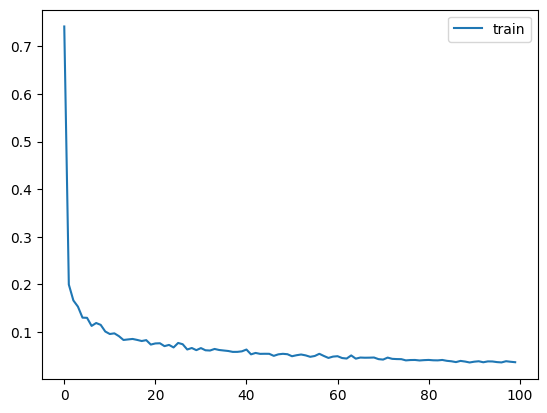

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],label='train')
plt.legend()
plt.show()



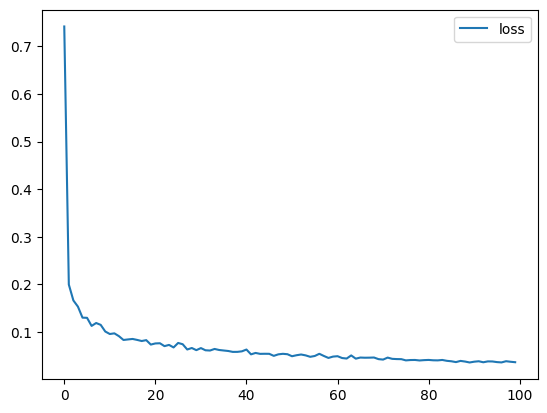

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],label='loss')
plt.legend()
plt.show()


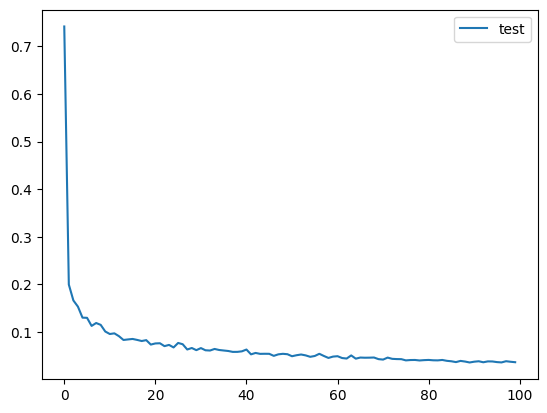

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],label='test')
plt.legend()
plt.show()


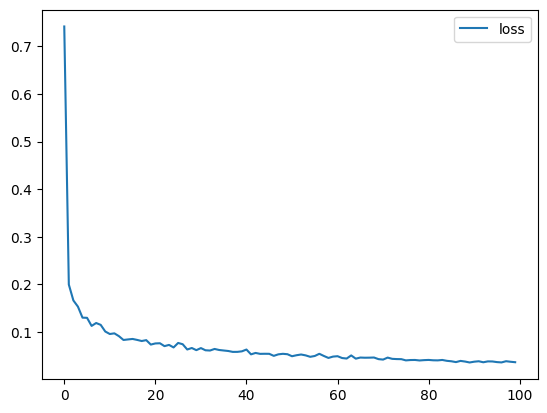

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9861783095308673
0.12315091549760676
0.28547965998301333


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_test,y_test)
y_pred=lr.predict(x_test)

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.98622422448252
0.1300774822804036
0.2845313110950659
